In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder


In [ ]:
from google.colab import files
upload=files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [ ]:
train_df=pd.read_csv('SalaryData_Train.csv')

In [ ]:
train_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
from google.colab import files
upload=files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [ ]:
test_df=pd.read_csv("SalaryData_Test.csv")

In [ ]:
test_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
test_df.duplicated().sum()

930

In [ ]:
train_df.duplicated().sum()

3258

In [ ]:
test_df=test_df.drop_duplicates()

In [ ]:
train_df=train_df.drop_duplicates()

In [ ]:
test_df['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

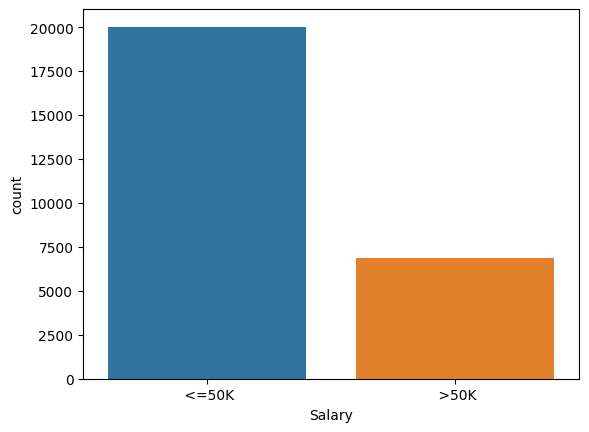

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [ ]:
sns.countplot(x='Salary',data=train_df)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
train_df['Salary'].value_counts()

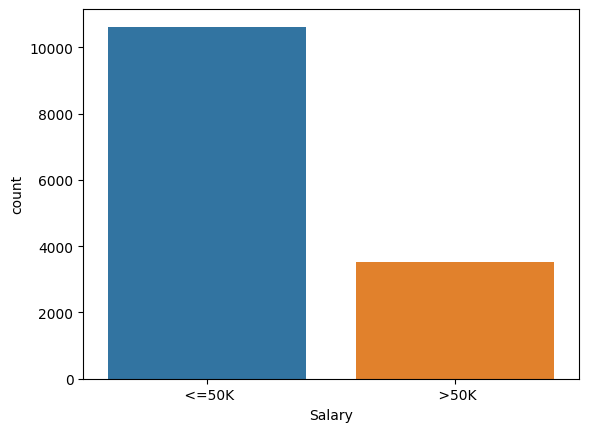

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [ ]:
sns.countplot(x='Salary',data= test_df)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
test_df['Salary'].value_counts()

<Axes: xlabel='education'>

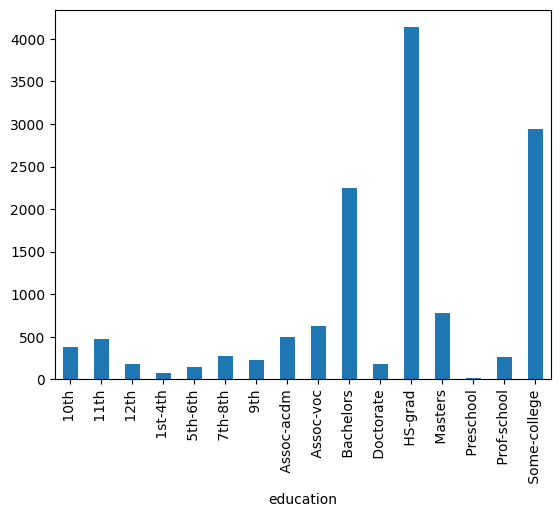

In [ ]:
pd.crosstab(train_df['Salary'],train_df['education']).mean().plot(kind='bar')

<Axes: xlabel='education'>

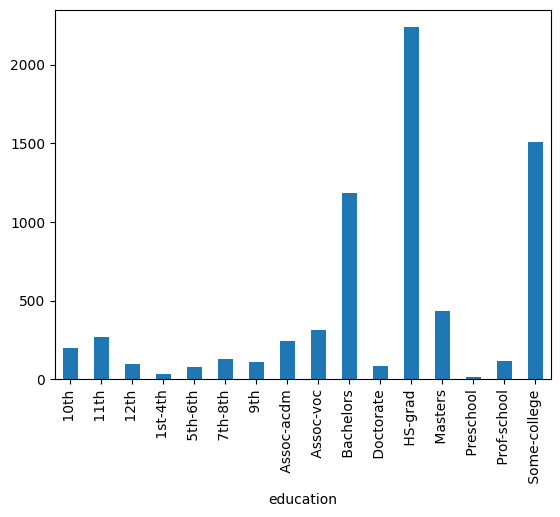

In [ ]:
pd.crosstab(test_df['Salary'],test_df['education']).mean().plot(kind='bar')

In [ ]:
#to convert categorical variables into numerical and fit it into train dataset
train=train_df.apply(LabelEncoder().fit_transform)
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,36,2,12,13,2,3,0,4,1,0,0,39,37,1
30155,5,2,15,9,4,10,1,4,1,0,0,39,37,0
30156,10,2,7,11,2,12,5,4,0,0,0,37,37,0
30158,41,2,11,8,6,0,4,4,0,0,0,39,37,0


In [ ]:
test=test_df.apply(LabelEncoder().fit_transform)
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
#splitting the training datasets into independent variables
x_train=train.drop(['education','relationship','native','maritalstatus','sex','race','Salary'],axis=1).values
y_train=train['Salary'].values
print(np.unique(y_train))

[0 1]


In [ ]:
#splitting the training datasets into independent variables
x_test=test.drop(['education','relationship','native','maritalstatus','sex','race','Salary'],axis=1).values
y_test=test['Salary'].values
print(np.unique(y_train))

[0 1]


In [ ]:
x_test

array([[ 8,  2,  6, ...,  0,  0, 39],
       [21,  2,  8, ...,  0,  0, 49],
       [11,  1, 11, ...,  0,  0, 39],
       ...,
       [21,  2, 12, ...,  0,  0, 49],
       [27,  2, 12, ..., 73,  0, 39],
       [18,  3, 12, ...,  0,  0, 59]])

In [ ]:
#gaussian naive Bayes
gnb=GaussianNB()

In [ ]:
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
# to find accuracy score of model
gnb.score(x_train,y_train)

0.786380701037059

In [ ]:
y_pred=gnb.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
accuracy_test=np.mean(y_pred==y_test)
accuracy_test

0.7909412597310687

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,y_pred)
cn

array([[10058,   562],
       [ 2392,  1118]])

In [ ]:
#calculating the accuracy score from the model and actual values from data
'''Gaussian Naive Bayes model accuracy'''
(metrics.accuracy_score(y_test,y_pred)*100)

79.09412597310687

In [ ]:
#predicted probabilities
y_pred_prob=gnb.predict_proba(x_test)[0:10]
y_pred_prob

array([[9.96490908e-01, 3.50909220e-03],
       [9.68303136e-01, 3.16968637e-02],
       [9.66370247e-01, 3.36297535e-02],
       [1.90943209e-10, 1.00000000e+00],
       [9.97037940e-01, 2.96205953e-03],
       [7.94191716e-03, 9.92058083e-01],
       [9.90384012e-01, 9.61598795e-03],
       [9.99628013e-01, 3.71986714e-04],
       [7.57873428e-08, 9.99999924e-01],
       [9.14026240e-01, 8.59737604e-02]])

In [ ]:
y_pred1 = gnb.predict_proba(x_test)[::, 1]
y_pred1

array([0.00350909, 0.03169686, 0.03362975, ..., 0.12340564, 0.99999982,
       0.12164341])

In [ ]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(gnb, x_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))


Cross validated ROC AUC : 0.8210


In [ ]:
# Applying 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.78595318 0.78186548 0.78446674 0.78178439 0.78884758 0.78624535
 0.78252788 0.78921933 0.78178439 0.79925651]


In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))


Average cross-validation score: 0.7862
